Install Packages

In [1]:
! pip install geopandas
! pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import folium

Read .shp file

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Path to shape file
SHAPE_PATH = "lct_000b21a_e/lct_000b21a_e.shp"
gdf = gpd.read_file(SHAPE_PATH)

gdf.head()

,CTUID,DGUID,CTNAME,LANDAREA,PRUID,geometry
0,5370001.08,2021S05075370001.08,0001.08,1.6383,35,"POLYGON ((7196507.366 869787.991, 7196501.617 ..."
1,0010002.00,2021S05070010002.00,0002.00,1.9638,10,"POLYGON ((8980216.643 2151065.36, 8980377.609 ..."
2,5370001.09,2021S05075370001.09,0001.09,1.9699,35,"POLYGON ((7196437.003 869160.246, 7196434.403 ..."
3,5370120.02,2021S05075370120.02,0120.02,76.9650,35,"POLYGON ((7189475.703 865662.849, 7189448.943 ..."
4,0010006.00,2021S05070010006.00,0006.00,1.0467,10,"POLYGON ((8980091.143 2152478.609, 8980100.254..."


# **CT LEVEL CALCULATION**

In [4]:
# CT level

# for toronto
toronto_gdf = gdf[gdf['CTUID'].str.startswith('5350')]
toronto_gdf = toronto_gdf[toronto_gdf['CTUID'].between('5350001', '5350379')]

toronto_gdf_boundaries = toronto_gdf.copy()
toronto_gdf['centroid'] = toronto_gdf.geometry.centroid
centroids_gdf = gpd.GeoDataFrame(toronto_gdf[['CTUID']], geometry=toronto_gdf['centroid'])

In [6]:
toronto_gdf_boundaries.head()

,CTUID,DGUID,CTNAME,LANDAREA,PRUID,geometry
486,5350128.04,2021S05075350128.04,0128.04,0.1620,35,"POLYGON ((7223015.3 933307.794, 7222831.411 93..."
501,5350363.06,2021S05075350363.06,0363.06,0.8210,35,"POLYGON ((7232843.491 944100.077, 7232826.009 ..."
505,5350363.07,2021S05075350363.07,0363.07,2.2422,35,"POLYGON ((7234552.26 946407.477, 7234551.317 9..."
507,5350378.23,2021S05075350378.23,0378.23,1.5314,35,"POLYGON ((7231005.043 945695.857, 7231005.011 ..."
508,5350378.24,2021S05075350378.24,0378.24,2.5129,35,"POLYGON ((7231622.351 946332.894, 7231622.306 ..."


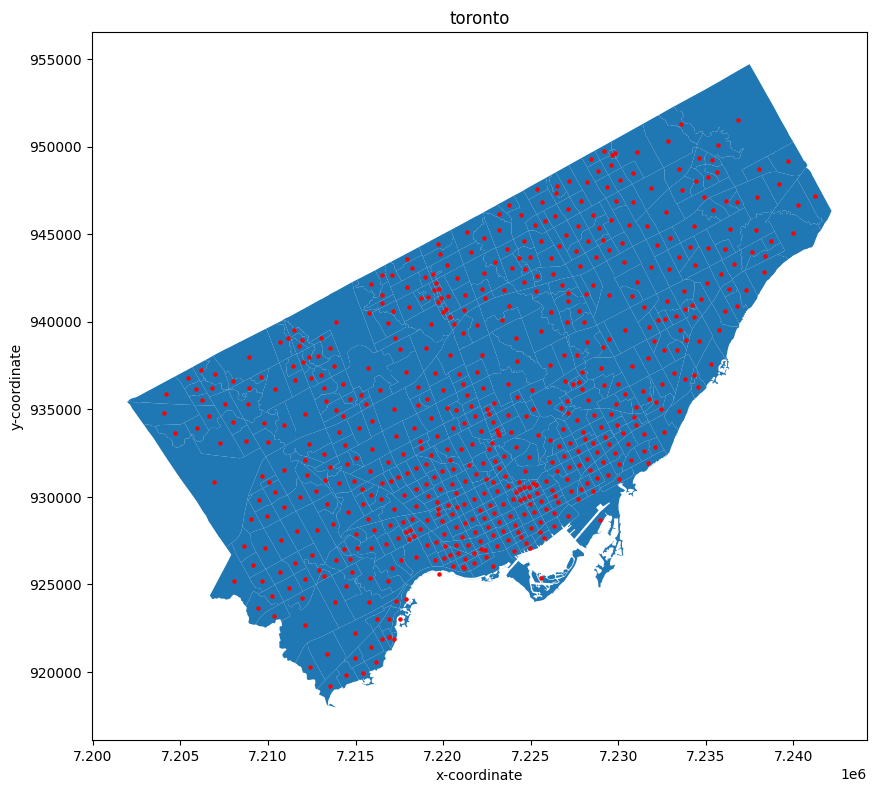

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
toronto_gdf.plot(ax=ax)
centroids_gdf.plot(ax=ax, color='red', marker='o', markersize=5, label='Centroids')
plt.title('toronto')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

In [18]:
import pandas as pd

# Read the CSV file
file_path = '/Users/max/Desktop/Transit_Dashboard/src/calculation/results/total_Metric_Table_Ontario_Line_Update.csv'  # Update this to your file path
data = pd.read_csv(file_path)

# Filter the data based on the given conditions
# filtered_data = data[(data['Metric_Name'] == 'Travel Time Reduction to First Destination') & 
#                      (data['Before_After_Benefit'] == 'benefit')& (data['Category'] == 'Libraries')]
filtered_data = data[(data['Metric_Name'] == 'Job Access') & 
                     (data['Before_After_Benefit'] == 'benefit')& (data['Category'] == 'Grand Total')& (data['Travel_Time_Threshold'] == 30)]
# Number of Destinations Accessible
# Select only the CTUID and Value columns
filtered_data = filtered_data[['CTUID', 'Value']]

# Save the filtered data to a new CSV file
output_file_path = 'filtered_travel_time_reduction.csv'  # Update the output path as needed
filtered_data["CTUID"] = filtered_data["CTUID"].apply(lambda x: f"{float(x):.2f}")
filtered_data.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}")

Filtered data saved to filtered_travel_time_reduction.csv


In [19]:
# Ensure CTUID in both DataFrames are of the same type
filtered_data['CTUID'] = filtered_data['CTUID'].astype(str)
toronto_gdf_boundaries['CTUID'] = toronto_gdf_boundaries['CTUID'].astype(str)

# Merge the DataFrame with the GeoDataFrame
merged_gdf = toronto_gdf_boundaries.merge(filtered_data, on='CTUID', how='left')
merged_gdf = merged_gdf[merged_gdf["Value"]>0]
# Display the first few rows of the merged GeoDataFrame
merged_gdf.head()

,CTUID,DGUID,CTNAME,LANDAREA,PRUID,geometry,Value
5,5350010.01,2021S05075350010.01,0010.01,0.2476,35,"POLYGON ((-79.41145 43.64075, -79.41128 43.640...",39170.0
6,5350010.02,2021S05075350010.02,0010.02,0.5382,35,"POLYGON ((-79.4104 43.64024, -79.41128 43.6402...",126005.0
14,5350014.00,2021S05075350014.00,0014.00,0.4727,35,"POLYGON ((-79.38403 43.64496, -79.38501 43.644...",14019.0
15,5350015.00,2021S05075350015.00,0015.00,0.2860,35,"POLYGON ((-79.37575 43.64745, -79.37696 43.646...",9903.0
16,5350016.00,2021S05075350016.00,0016.00,0.6317,35,"POLYGON ((-79.35707 43.65476, -79.35707 43.654...",94887.0


In [15]:
# print("EPSG TORONTO: ", toronto_gdf_boundaries.crs)
# ct_cen = centroids_gdf.copy()

# toronto_gdf_boundaries = toronto_gdf_boundaries.to_crs(epsg=4326) # correct to 4326
# ct_cen = ct_cen.to_crs(epsg=4326)

# # toronto_gdf_boundaries.head()
# m = folium.Map(location=[43.65107, -79.347015], zoom_start=10)
# folium.GeoJson(toronto_gdf_boundaries.to_json(), name='geojson').add_to(m)
# folium.GeoJson(ct_cen.to_json(), name='geojson').add_to(m)

# # scale_js = """
# # function resizeMarker() {
# #     var zoomLevel = map.getZoom();
# #     var newRadius = zoomLevel * 1.5;  // Adjust scaling factor as needed

# #     // Set the new radius for the marker
# #     var markerElement = document.querySelector('.leaflet-interactive');
# #     if (markerElement) {
# #         markerElement.setAttribute('r', newRadius.toString());
# #     }
# # }

# # map.on('zoomend', resizeMarker);
# # resizeMarker();  // Call once to initialize
# # """

# scale_js = """
# function resizeMarker() {
#     var zoomLevel = map.getZoom();
#     var newRadius = Math.max(0.1, 10 / zoomLevel);  // Scale factor for reverse zoom effect, adjust 25 as needed

#     // Set the new radius for the marker
#     var markerElement = document.querySelector('.leaflet-interactive');
#     if (markerElement) {
#         markerElement.setAttribute('r', newRadius.toString());
#     }
# }

# map.on('zoomend', resizeMarker);
# resizeMarker();  // Initialize at current zoom level
# """

# # Attach the JavaScript to the map
# m.get_root().html.add_child(folium.Element(f"<script>{scale_js}</script>"))

# m.save('toronto_map_test.html')
# m



In [20]:
m = folium.Map(location=[43.65107, -79.347015], zoom_start=10)

geojson = folium.GeoJson(
    merged_gdf.to_json(),name='geojson',
    style_function=lambda feature: {
        'color': 'black',          # Initial border color
        'weight': 2,
        'fillOpacity': 0.2,
    },
    highlight_function=lambda feature: {
        'color': 'blue',           # Highlight color when hovering
        'weight': 3,
    }
)

# Add a click event to change border color
click_js = """
function(feature, layer) {
    layer.on('click', function() {
        layer.setStyle({
            color: 'red',           // Change border color on click
            weight: 3
        });
    });
}
"""

# Bind the click function to the GeoJson layer
geojson.add_child(folium.GeoJsonTooltip(fields=['CTUID', "CTNAME", "Value"], aliases=['Census Tract ID:', "Census Tract Name: ", "Value"]))
geojson.add_child(folium.Element(f'<script>{click_js}</script>'))
m.add_child(geojson)

m.save('toronto_map_test.html')
m

In [ ]:
m = folium.Map(location=[43.65107, -79.347015], zoom_start=10)

geojson = folium.GeoJson(
    merged_gdf.to_json(),name='geojson',
    style_function=lambda feature: {
        'color': 'black',          # Initial border color
        'weight': 2,
        'fillOpacity': 0.2,
    },
    highlight_function=lambda feature: {
        'color': 'blue',           # Highlight color when hovering
        'weight': 3,
    }
)

# Add a click event to change border color
click_js = """
function(feature, layer) {
    layer.on('click', function() {
        layer.setStyle({
            color: 'red',           // Change border color on click
            weight: 3
        });
    });
}
"""

# Bind the click function to the GeoJson layer
geojson.add_child(folium.GeoJsonTooltip(fields=['CTUID', "CTNAME", "Value"], aliases=['Census Tract ID:', "Census Tract Name: ", "Value"]))
geojson.add_child(folium.Element(f'<script>{click_js}</script>'))
m.add_child(geojson)

m.save('toronto_map_test.html')
m

In [ ]:
# for clicking
import folium
import geopandas as gpd

# Load the GeoDataFrame with boundaries (replace with your file path)
gdf = gpd.read_file('path/to/your/boundary_file.shp')

# Reproject to WGS84 if necessary
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

# Initialize the map
m = folium.Map(location=[43.65107, -79.347015], zoom_start=10)

# Define the GeoJson layer with click-to-show-popup interactivity
geojson = folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        'color': 'black',          # Initial border color
        'weight': 2,
        'fillOpacity': 0.2,
    },
    highlight_function=lambda feature: {
        'color': 'blue',           # Optional highlight color on hover
        'weight': 3,
    }
)

# Add a popup on click with information (e.g., feature's name or ID)
popup = folium.GeoJsonPopup(
    fields=['name'],               # Replace 'name' with the column you want to display
    aliases=['Boundary Name:'],     # Label for the popup field
    localize=True
)

# Attach the popup to the GeoJson layer
geojson.add_child(popup)

# Add the GeoJson layer to the map
m.add_child(geojson)

# Display the map
m.save('interactive_boundary_map_with_click_popup.html')
m

## Save Files

In [ ]:
# Save to geojson
n_centroids_gdf = gpd.GeoDataFrame(toronto_gdf[['CTUID']], geometry=toronto_gdf['centroid'])
OUTPUT_PATH = "/content/toronto_ct_centroids.geojson"
# n_centroids_gdf.to_json(OUTPUT_PATH)
n_centroids_gdf.to_file(OUTPUT_PATH, driver='GeoJSON')
print("Saved to destination")

In [ ]:
# Save to CSV
OUTPUT_PATH_toronto_with_centroid = "/content/toronto_ct_boundaries_centroids.csv"

toronto_df = pd.DataFrame(toronto_gdf)
toronto_df.to_csv(OUTPUT_PATH_toronto_with_centroid, index=False)
print("Saved to destination")

Saved to destination


# **DA LEVEL CALCULATION**

In [ ]:
# DA level
toronto_gdf = gdf[gdf['DAUID'].str.startswith('3520')]
toronto_gdf['centroid'] = toronto_gdf.geometry.centroid
centroids_gdf = gpd.GeoDataFrame(toronto_gdf[['DAUID']], geometry=toronto_gdf['centroid'])

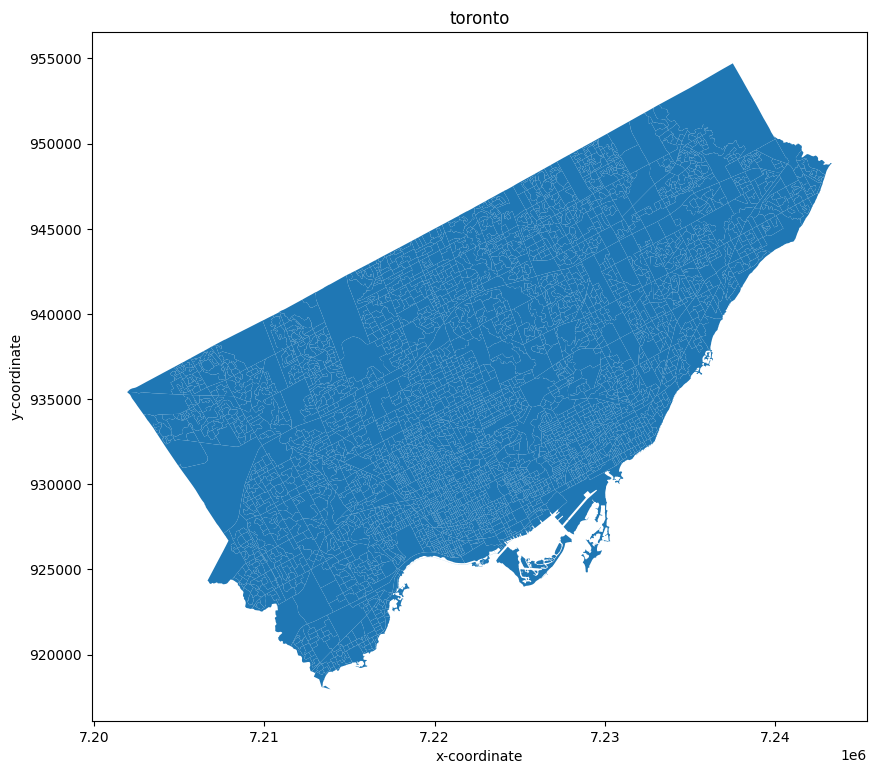

In [ ]:
# by DA
fig, ax = plt.subplots(figsize=(10, 10))
toronto_gdf.plot(ax=ax)
# gdf.plot(ax=ax, color='red', marker='o', markersize=0.01, label='Centroids')
# plt.xlim(-180, -60)
# plt.ylim(10, 80)
plt.title('toronto')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

In [ ]:
n_centroids_gdf = gpd.GeoDataFrame(toronto_gdf[['DAUID']], geometry=toronto_gdf['centroid'])
OUTPUT_PATH = "/content/toronto_da_centroids.geojson"
# n_centroids_gdf.to_json(OUTPUT_PATH)
n_centroids_gdf.to_file(OUTPUT_PATH, driver='GeoJSON')